<a href="https://colab.research.google.com/github/CNIU1997/BA_888/blob/master/BA888_initial_siqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [0]:
import pandas as pd
import numpy as np

train = pd.read_csv('train_data.csv',index_col=0)
train = train.iloc[:-2].drop(['X1','PRICE_VAR','year'],axis=1)
train = pd.get_dummies(train, columns=['Sector'])
cols = train.select_dtypes(exclude=['float']).columns
train[cols] = train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,224,225,226) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, comp

In [0]:
trainp = (train
     .pipe(lambda df: df.loc[:, df.dtypes.values != np.dtype('O')])  # drop str columns
     .pipe(lambda df: df.loc[:, (df.isnull().sum(axis='rows') < 8000).where(lambda v: v).dropna().index.values])  # drop columns with greater than 10000 null values
     .dropna()
)
print(trainp)

In [0]:
# trainp=pd.get_dummies(train, columns=['Sector'])
# trainp['PRICE_VAR'] = pd.to_numeric(trainp['PRICE_VAR'], errors='coerce')
y = trainp['Class']
X = trainp.drop(['Class'],axis=1)
# X[X==np.inf]=np.nan
# X.fillna(X.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


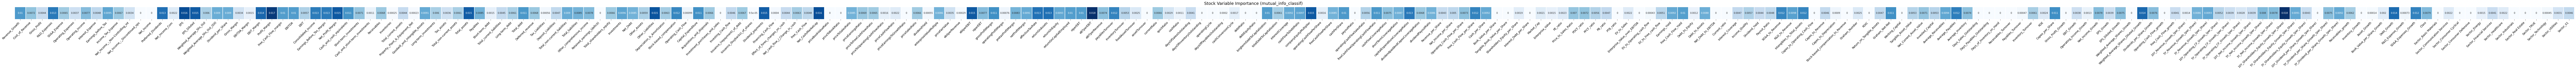

In [0]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
stock_mutual_information = mutual_info_classif(X, y)

plt.subplots(1,figsize=(200,1))
sns.heatmap(stock_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(trainp.columns[1:], rotation=45, ha='right', fontsize=12)
plt.suptitle("Stock Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)
pass

In [0]:
from sklearn.feature_selection import GenericUnivariateSelect
trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile',param=10)
stock_X_trans = trans.fit_transform(X, y)
print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, stock_X_trans.shape[1]))

We started with 233 features but retained only 24 of them!


In [0]:
columns_retained_Select = X.columns[trans.get_support()].values
list(pd.DataFrame(stock_X_trans, columns=columns_retained_Select).keys())

['Gross_Profit',
 'Net_Income',
 'Net_Income_Com',
 'EBIT_Margin',
 'Profit_Margin',
 'Free_Cash_Flow_margin',
 'Consolidated_Income',
 'Earnings_Before_Tax_Margin',
 'Net_Profit_Margin',
 'Total_non-current_assets',
 'Total_shareholders_equity',
 'Other_Assets',
 'Issuance_(buybacks)_of_shares',
 'Free_Cash_Flow',
 'ebitperRevenue',
 'niperEBT',
 'netProfitMargin',
 'returnOnAssets',
 'nIperEBT',
 'eBITperRevenue',
 'Return_on_Tangible_Assets',
 'Weighted_Average_Shares_Growth',
 'Weighted_Average_Shares_Diluted_Growth',
 'Book_Value_per_Share_Growth']

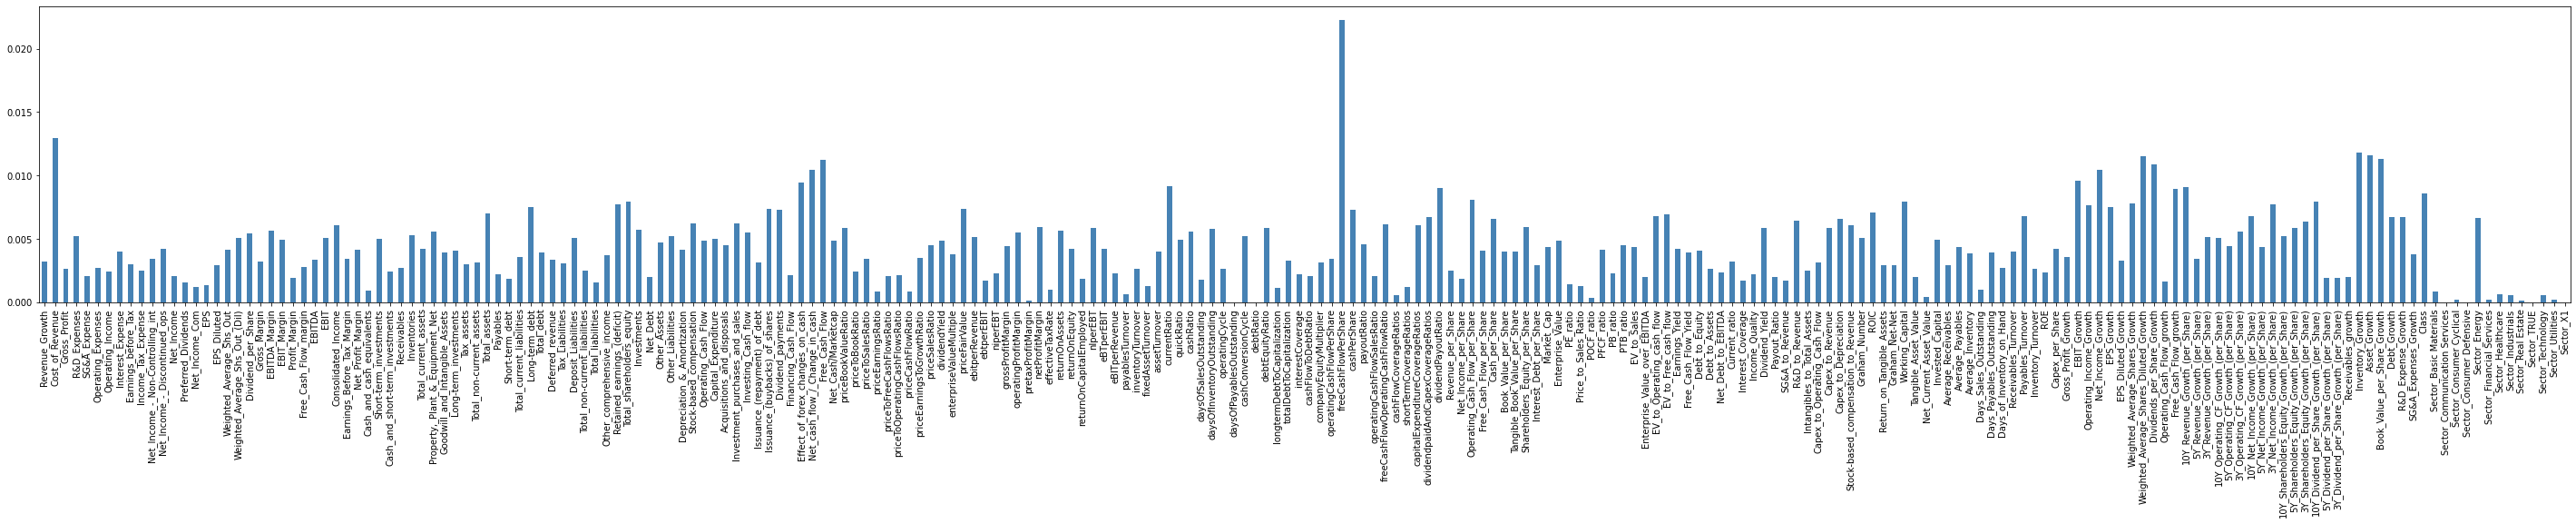

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

pd.Series(clf.feature_importances_, index=trainp.columns[1:]).plot.bar(color='steelblue', figsize=(50, 6))

In [0]:
from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold='2*mean')
stock1_X_trans = trans.fit_transform(X, y)
print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, stock1_X_trans.shape[1]))

We started with 233 features but retained only 16 of them!


In [0]:
columns_retained_FromMode = X.columns[trans.get_support()]
pd.DataFrame(stock1_X_trans, columns=columns_retained_FromMode).keys()

Index(['Revenue_Growth', 'Issuance_(buybacks)_of_shares',
       'Financing_Cash_Flow', 'Effect_of_forex_changes_on_cash',
       'Net_cash_flow_/_Change_in_cash', 'operatingCashFlowPerShare',
       'Net_Income_per_Share', 'Free_Cash_Flow_per_Share',
       'Gross_Profit_Growth', 'Operating_Income_Growth',
       'Weighted_Average_Shares_Growth',
       'Weighted_Average_Shares_Diluted_Growth', 'Operating_Cash_Flow_growth',
       'Receivables_growth', 'Inventory_Growth', 'Asset_Growth'],
      dtype='object')